Theoretical Telehealth Platform
=====

**ARCHITECTURE**

The system architecture prioritizes serverless design and minimal management, harnessing Google Cloud’s elastic and automated services. The architecture balances structured and real-time data management while minimizing financial burdens. 

Firebase Hosting serves the frontend web application, offering a secure and scalable solution built in with Google's Content Delivery Network (CDN) for accelerated content delivery. Cloud's Load Balancer functions as the API gateway, routing API requests efficiently to backend services.

Cloud Run hosts the signaling server, facilitating event driven Web Real-Time Communication (WebRTC) session setup via WebSocket handovers. By deploying Janus through Google's Kubernetes Engine (GKE), Janus server volume can adjust to assume session hosting in cases where direct peer-to-peer connections fail. Coturn, running on Google Compute Engine (GCE) with Managed Instance Groups (MIGs), stabilizes communications when NAT restrictions or firewalls block WebRTC connections. 

Cloud SQL (PostgreSQL) is the primary database for storing structured medical records, ensuring compliance with ACID transactions and HIPAA regulations. Firestore (NoSQL) supports real-time chat logs, notifications, and other unstructured data, enabling instant updates without the workload of relational queries. Google Memorystore (Redis) provides an in-memory caching layer, accelerating session state retrieval and authentication validations, further reducing direct database queries. Google IAM enforces Role-Based Access Control (RBAC), restricting access to sensitive medical data. This "serverless-first", low management paradigm optimizes scalability, security, and efficiency while reducing administrative complexity.

**FEATURES** 

_Patient_

The patient interface enables users to manage their accounts, request prescription refills, view electronic health records (EHR), schedule and track appointments, pay medical expenses, and join virtual consultations with their providers. Authentication is secured using Open Authorization 2.0 (OAuth) and Multi-Factor Authentication (MFA) via mobile or email. Virtual consultatiosn are established through WebRTC and WebSockets for live video and chat.

_Doctor_

The doctor interface provides tools for managing patient profiles, personal account settings, availability, appointment scheduling, and virtual consultations. A Role-Based Authentication and Privilege Management system enforces proper access control, ensuring that patients, doctors, and administrators can only view/interact with the features and data necessitated by their role. During consultations, doctors can review patient records and EHRs while using WebRTC and WebSockets for seamless video/chat communication.

_Administrator_

The administrator dashboard offers tools for user management, compliance oversight, and system performance monitoring. Google IAM (Identity and Access Management) oversees role-based authentication and the privilege management system, ensuring appropriate access and permissions for all staff members. System monitoring and logging are managed through Google Cloud Monitoring, Cloud Logging, and Cloud Security Command Center, detailing live tracking of performance metrics and operational health.

_System_

The system is designed for high performance, security, scalability, and fault tolerance by using Google Cloud’s managed services. WebRTC boasts low-latency video streams, while WebSockets support live chat, while Redis caching optimizes data retrieval. For HIPAA-compliance, AES-256 encryption is used for stored data, and TLS is for transmission. Role based authentication and priveleges are managed for all staff. A suite of Google Cloud features are utilitzed to establish failover mechanisms, fault tolerance, instance redundancies, and load balancing.

**Strategies**

_Performance_

The system optimizes video calls using WebRTC adaptive bitrate (ABR) streaming, safeguarding connections during various network conditions. Real-time chat is driven by WebSockets, reducing latency for instant communication. Google Cloud Memorystore (Redis) caches frequently accessed data, lessening database overhead for quicker response times. Google Firebase has integrated Cloud CDN functionality to accelerate frontend content delivery, further reducing load times and improving the user's experience.

_Security_

By default for HIPAA-compliancy, the system is already using AES-256 for data at rest, and TLS 1.2+ for data in transit. OAuth 2.0 and MFA handle user authentication for all users and administrators, preventing unauthorized access. Google IAM implements Role-Based Access Control (RBAC), permeating granular and specifc permissions through all Cloud resources. Cloud logs and security services provide live-feed security management, tracking, and potential compromising system events.

_Scalability_

Scalability is embedded into every component, persisting high performance under mercurial traffic loads. Cloud Run auto-scales signaling instances based on WebSocket volume, while GKE scales Janus pods horizontally. Managed GCE groups automatically adjust Coturn server capacity. These services and platforms also spin down when idle, reducing overhead costs. Google Cloud’s built in elasticity and balancing maintain consistent and reliable performance througout. Cloud SQL spins up read replicas as needed, smoothing query operations for stable and rapid availability. Firestore automatically scales to handle real-time chat and notifications without performance degradation. Google Memorystore (Redis) allocates memory dynamically, storing frequently requested data readily available. Google Cloud Load Balancing intelligently distributes traffic across Janus (GKE), Coturn (GCE), and Cloud Run, preventing bottlenecks and optimizing resource usage. 

_Fault Tolerance_

This software is designed for high availability and resilience by leveraging Google's longstanding expertise and robust cloud infrastructure to sustain reliability at scale. Cloud SQL implements automatic failover for ensured continuity.  Google Compute Engine (GCE) Managed Instance Groups have elasticity and redundancy protocols to replace failed Coturn relay servers.  Cloud Load Balancer moderates traffic distributions through healthy, idle channels. Cloud Monitoring and security host real-time failure detection that extend to automated recovery alerts, providing proactive solutions to potential disruptions.

**Architectural Diagram**

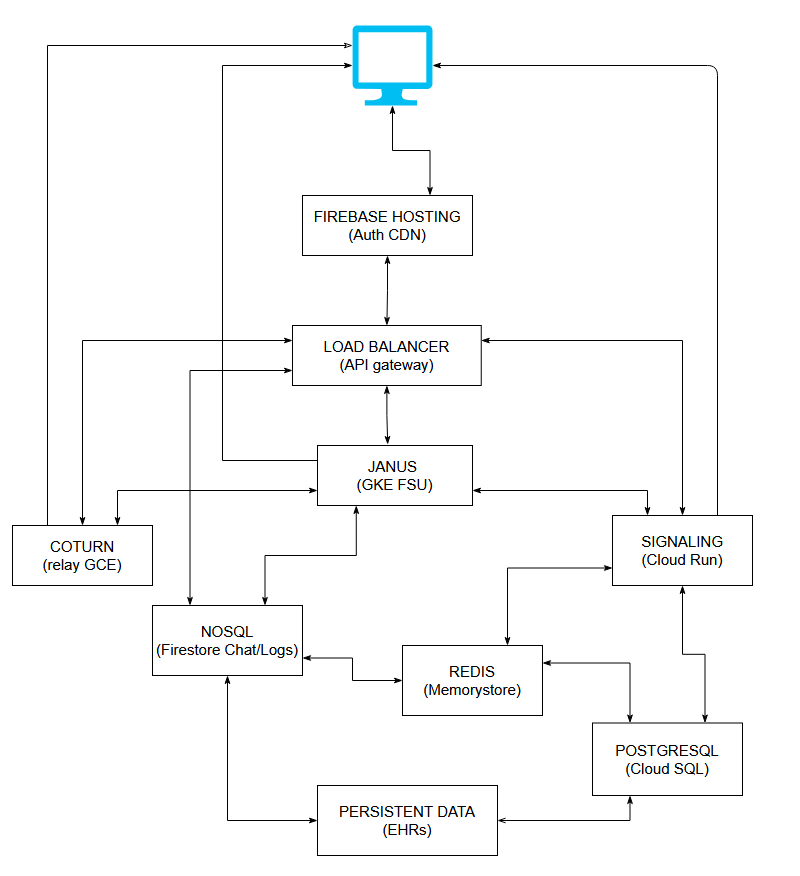

**SOURCES**

[HIPAA Compliance](https://www.hipaajournal.com/hipaa-encryption-requirements/)

[Google Cloud Encryption](https://cloud.google.com/storage/docs/encryption/default-keys)

[Janus Github](https://github.com/meetecho/janus-gateway)

[Coturn Github](https://github.com/coturn/coturn)